In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [40]:
px = 16
py = 8
#c = 6
c = px*py
t = 30
Ly = 1
Lx = 10
N = (px - 2)*(py - 2)
M_4x = px - 1
M_4y = py - 1
M = 2* M_4x + 2* M_4y
a = 2
b = 1
beta = Lx/Ly
rho = 1.0
mu = 1.0
vm = 1.0
Re = 10#Ly*vm*rho/mu
Re

10

In [41]:
def euclidian_distance(x,y,xyk,c):
    matrix = np.zeros([len(x)*len(y) ,c])
    number_matrix = np.zeros([len(x)*len(y),2])
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i
            m = j + i*len(y)
            matrix[m,:] = np.sqrt(np.square(x[n]- xyk[:,0])  + np.square(y[j] - xyk[:,1])) + (2.2250738585072014e-308)**(1/(2*a))
            number_matrix[m,0] = x[n]
            number_matrix[m,1] = y[j]
    return matrix, number_matrix

def points(x,y):
    matrix = np.zeros([len(x)*len(y),2])
    boundary = np.zeros([2*len(y)-4 + 2 * len(x),2])
    interior = np.zeros([(len(x) - 2) * (len(y)-2),2])
    h, u = 0,0
    for i in range(0,len(x)):
        for j in range(0,len(y)):
            n = i#%len(x)
            m = j + i*len(y)
            matrix[m,0] = x[n]
            matrix[m,1] = y[j]
        
            if n == 0 or n == len(x)-1 or j == 0 or j == len(y)-1:
                
                boundary[h,0] = x[n]
                boundary[h,1] = y[j]
                h+=1
            else:
                interior[u,0] = x[n]
            
                interior[u,1] = y[j]
                u+=1
    return matrix, boundary, interior

In [42]:
x = np.linspace(0,Lx,px)
y = np.linspace(0,Ly,py)

X,Y = np.meshgrid(x,y)

#Puntos internos

x_int = x[1:-1]
y_int = y[1:-1]
Xin,Yin = np.meshgrid(x_int,y_int)

#Puntos en las fronteras:
xf1, yf1 = (x, np.zeros(1)) # f(x,0) 
X1,Y1 = np.meshgrid(xf1 , yf1)
xf2,yf2 = (x, np.ones(1)*Ly) # f(x,L)
X2,Y2 = np.meshgrid(xf2 , yf2)
xf3,yf3 = (np.zeros(1), y_int ) #f(0,y)
X3,Y3 = np.meshgrid(xf3 , yf3)
xf4,yf4 = (np.ones(1)*Lx,y_int) #f(L,y)
X4,Y4 = np.meshgrid(xf4,yf4)

#Centros
x_c = np.linspace(0,Lx,px)
y_c = np.linspace(0,Ly,py)

xk = points(x_c,y_c)[0][:,0].reshape(-1,1)
yk = points(x_c,y_c)[0][:,1].reshape(-1,1)
#c = len(x_int)
xyk1 = np.concatenate((xk,yk),axis = 1)

#Puntos test
x_test = np.linspace(0,Lx,t)
y_test = np.linspace(0,Ly,t)
Xt,Yt = np.meshgrid(x_test,y_test)
x_vector = points(x,y)[0][:,0].reshape(-1,1)
y_vector = points(x,y)[0][:,1].reshape(-1,1)
x_vector.shape
x_v2 = euclidian_distance(x,y,xyk1,c)[1][:,0].reshape(-1,1)
x_v2.shape
bbb = points(x,y)[1]
bbb.shape
#bbb[-1]

(44, 2)

In [43]:
def tps_rbf(euclidian_distance,a=a,b=b):
    #if euclidian_distance == 0:
    #    return 0
    #else:
    return (euclidian_distance*b)**(2*a) *np.log(b*euclidian_distance) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdx(x_vector,euclidian_distance,a=a,b=b):
        return (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1)# #euclidian_distance + 1e-10 to avoid singularity at zero  
    
def tpsdy(y_vector,euclidian_distance,a=a,b=b):
        return (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1) /(euclidian_distance) * (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1)) #euclidian_distance + 1e-10 to avoid singularity at zero
def tpsdxx(x_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance) + 1)
                        + ((x_vector.reshape(-1,1) - xyk1[:,0].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) + 1) + 2*a))

def tpsdyy(y_vector,euclidian_distance,a=a,b=b):
        return ((euclidian_distance**2 - (y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))**2)/euclidian_distance**3 * (b)**(2*a) *euclidian_distance**(2*a-1)*(2*a*np.log(b*euclidian_distance ) + 1)
                        + ((y_vector.reshape(-1,1) - xyk1[:,1].reshape(1,-1))/euclidian_distance) **2 * b**(2*a) *euclidian_distance**(2*a-2) *((2*a-1)* (2*a*np.log(b*euclidian_distance) +1) +2*a))
  

In [44]:
euclidian_dist_complete = euclidian_distance(x,y,xyk1,c)[0]
euclidian_dist_int = euclidian_distance(x_int,y_int,xyk1,c)[0]

euclidian_dist_border1 = euclidian_distance(xf1,yf1,xyk1,c)[0]
euclidian_dist_border2 = euclidian_distance(xf2,yf2,xyk1,c)[0]
euclidian_dist_border3 = euclidian_distance(xf3,yf3,xyk1,c)[0]
euclidian_dist_border4 = euclidian_distance(xf4,yf4,xyk1,c)[0]

In [45]:
x_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,0]
y_vector_int = euclidian_distance(x_int,y_int,xyk1,c)[1][:,1]
euclidian_dist_int
i , j = np.where(euclidian_dist_int == 0)
i

array([], dtype=int64)

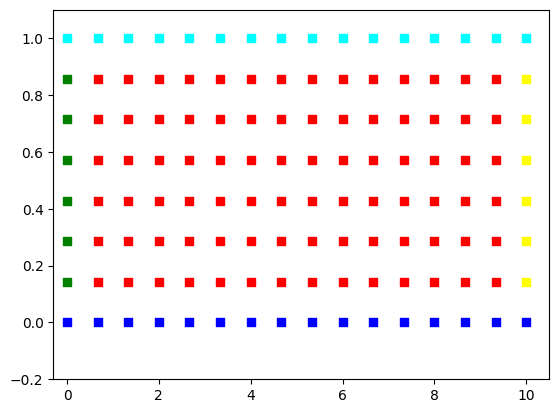

In [46]:
#Plot the colocation points
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([-0.3,Lx*1.05])
ax.set_ylim([-0.2,Ly*1.1])
ax.scatter(Xin,Yin,marker='s', color='red')
ax.scatter(X1,Y1,marker='s', color = 'blue')

ax.scatter(X2,Y2,marker='s', color = 'cyan')
ax.scatter(X3,Y3,marker='s', color = 'green')
ax.scatter(X4,Y4,marker = 's' ,color = 'yellow')
#ax.scatter(XC,YC, color = 'black')
plt.show()

In [47]:

gxx_int = (tpsdxx(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy(y_vector_int,euclidian_dist_int)
g_int = tps_rbf(euclidian_dist_int)
gx_b4 = tpsdx(np.ones_like(y_int)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy(y_int,euclidian_dist_border4)
gxx_b4 = tpsdxx(np.ones_like(y_int)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy(y_int,euclidian_dist_border4)
gb2 = tps_rbf(euclidian_dist_border2)
gb3 = tps_rbf(euclidian_dist_border3)
gxx_b3 = tpsdxx(np.zeros_like(y_int),euclidian_dist_border3)
gyy_b3 = tpsdyy(y_int,euclidian_dist_border3)
gx_b3 = tpsdx(np.zeros_like(y_int),euclidian_dist_border3)
gy_b3 = tpsdy(y_int,euclidian_dist_border3)

gb1 = tps_rbf(euclidian_dist_border1)


In [48]:
weights = np.random.normal(0,(Ly/(2*px*py)),2*px*py)*Ly#/(2*px*py)
wx = weights[:N+M].reshape(-1,1)
wy = weights[N+M:].reshape(-1,1)
weights.max()

0.010577635133218584

In [70]:
def stationary_navier_stokes(weights):
        
    wx = weights[:N+M].reshape(-1,1)
    wy = weights[N+M:].reshape(-1,1)
    
    F = np.zeros(((3*N+4*(M_4x+1) + 6*(M_4y-1)),))
    
    
    F[0:N] =  ( 1/Re*(-1/beta**2*np.dot(gxx_int,wx) - np.dot(gyy_int,wx)) - 10/beta).flatten()
    
    F[N:2*N] = ( 1/Re*(-1/beta**2*np.dot(gxx_int,wy) - np.dot(gyy_int,wy))).flatten() 
    F[2*N:3*N] = (np.dot(gx_int,wx)/Lx + np.dot(gy_int,wy)/Ly).flatten()
    

    F[3*N+4*(M_4x+1) : 3*N+4*(M_4x+1) +1*(M_4y-1) ] = ( 1/Re*(-1/beta**2*np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx)) - 10/beta ).flatten()
    F[3*N+4*(M_4x+1) +1*(M_4y-1) : 3*N+4*(M_4x+1) + 2*(M_4y-1) ] = ( 1/Re*(-1/beta**2*np.dot(gxx_b3,wx) - np.dot(gyy_b3,wx)) - 10/beta).flatten()
    F[ 3*N+4*(M_4x+1) + 2*(M_4y-1):  3*N+4*(M_4x+1) + 3*(M_4y-1)] = (np.dot(gx_b4,wx)/Lx + np.dot(gy_b4,wy)/Ly).flatten()
    F[3*N+4*(M_4x+1) + 3*(M_4y-1): 3*N+4*(M_4x+1) + 4*(M_4y-1)] = (np.dot(gx_b3,wx)/Lx + np.dot(gy_b3,wy)/Ly).flatten()
    #F[3*N :3*N + (M_4 - 1)] = (np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
    F[3*N+4*(M_4x+1) + 4*(M_4y-1): 3*N + 4*(M_4x+1) + 5*(M_4y-1)] = ( 1/Re*(-1/beta**2*np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy))).flatten()
    F[3*N + 4*(M_4x+1) + 5*(M_4y-1): 3*N + 4*(M_4x+1) + 6*(M_4y-1)] = ( 1/Re*(-1/beta**2*np.dot(gxx_b3,wy) - np.dot(gyy_b3,wy))).flatten()
    
    F[3*N  : 3*N +  M_4x + 1] = ( np.dot( gb2 , wx ) ).flatten()
    F[3*N + ( M_4x + 1 ): 3*N + 2 * ( M_4x + 1 )] = (np.dot(gb1,wx)).flatten()
    
    #F[3*N + 2*(M_4 - 1) + 2*(M_4 + 1):3*N + 3*(M_4 - 1) + 2*(M_4 + 1)] = (np.dot(gb3,wy)).flatten()
    F[3*N + 2 * ( M_4x + 1 ):3*N + 3 * ( M_4x + 1 )] = (np.dot(gb2,wy)).flatten()
    F[3*N + 3 * ( M_4x + 1 ):3*N + 4 * ( M_4x + 1 )] = (np.dot(gb1,wy)).flatten()
    #F[3*N + 1*(M_4 - 1)+ 4*(M_4 + 1):3*N + 2*(M_4 - 1)+ 4*(M_4 + 1)] = np.dot(gx_b4,wy).flatten()
    
    #F[3*N + 2*(M_4 - 1)+ 4*(M_4 + 1):3*N + 3*(M_4 - 1)+ 4*(M_4 + 1)] = ( -np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx) - 10).flatten()
    #F[3*N + 5*(M_4 - 1)+ 4*(M_4 + 1):3*N + 5*(M_4 - 1)+ 5*(M_4 + 1)] = ( -np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy)).flatten()
    
    
    return F#,F.shape
    
    

In [67]:
from scipy.optimize import least_squares
Re = 2000
# Define el vector inicial
x0 = (weights.reshape(-1) ) # tamaño_total = tamaño del vector weights
print(stationary_navier_stokes(weights).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado = least_squares(stationary_navier_stokes, x0, method='trf', verbose = 2) 

True
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         9.2297e+05                                    4.13e+07    
       1              2         4.7944e+01      9.23e+05       6.26e-02       4.19e-01    
       2              3         4.7825e+01      1.18e-01       1.25e-01       1.55e-01    
       3              4         4.7591e+01      2.35e-01       2.51e-01       2.35e-01    
       4              5         4.7124e+01      4.67e-01       5.01e-01       3.58e-01    
       5              6         4.6200e+01      9.24e-01       1.00e+00       4.77e+00    
       6              7         4.4387e+01      1.81e+00       2.00e+00       1.12e+01    
       7              8         4.0895e+01      3.49e+00       4.01e+00       1.73e+00    
       8              9         3.4432e+01      6.46e+00       8.02e+00       7.79e+01    
       9             10         2.3568e+01      1.09e+01       1.60e+01       2.88e+0

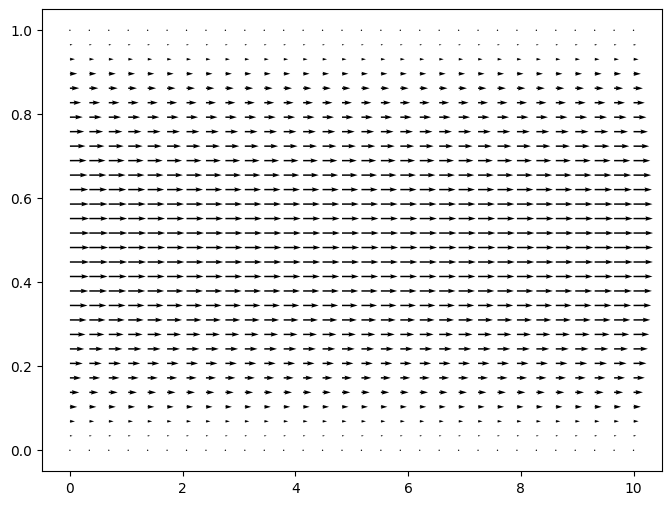

In [68]:
# Plot quiver 
euclidian_dist_test = euclidian_distance(x_test,y_test,xyk1,c)[0]
ux = tps_rbf(euclidian_dist_test) @ resultado.x[:N+M]
uy = tps_rbf(euclidian_dist_test) @ resultado.x[N+M:]

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xt, Yt, ux.reshape(t,t).T, uy.reshape(t,t).T)

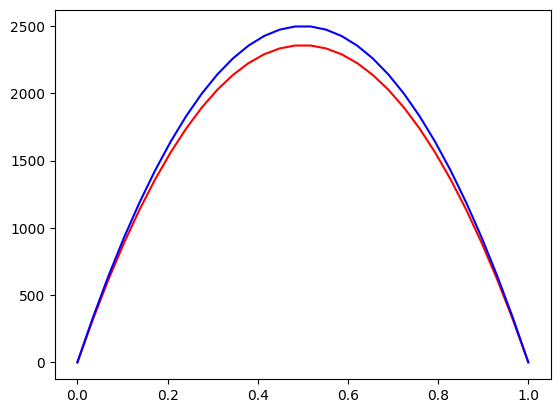

In [71]:
plt.plot(y_test,10*ux.reshape(t,t).T[:,0], color = 'red')
plt.plot(y_test,-Re*5*(y_test**2 - Ly*y_test), color = 'blue')

In [72]:
gxx_int = (tpsdxx(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy(y_vector_int,euclidian_dist_int)
g_int = tps_rbf(euclidian_dist_int)
gx_b4 = tpsdx(np.ones_like(y_int)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy(y_int,euclidian_dist_border4)
gxx_b4 = tpsdxx(np.ones_like(y_int)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy(y_int,euclidian_dist_border4)
gb2 = tps_rbf(euclidian_dist_border2)
gb3 = tps_rbf(euclidian_dist_border3)
gxx_b3 = tpsdxx(np.zeros_like(y_int),euclidian_dist_border3)
gyy_b3 = tpsdyy(y_int,euclidian_dist_border3)
gx_b3 = tpsdx(np.zeros_like(y_int),euclidian_dist_border3)
gy_b3 = tpsdy(y_int,euclidian_dist_border3)

gb1 = tps_rbf(euclidian_dist_border1)
gb4 = tps_rbf(euclidian_dist_border4)

In [73]:
phidphidx2 = g_int * gx_int
phidphidy2 = g_int * gy_int	

phidphidx_b32 = gb3*gx_b3
phidphidy_b32 = gb3*gy_b3
phidphidx_b42 = gb4*gx_b4
phidphidy_b42 = gb4*gy_b4


In [74]:

def NavierStokess(weights):
        
    wx = weights[:N+M].reshape(-1,1)
    wy = weights[N+M:].reshape(-1,1)
    #Review why is it better without the transpose
    wxiwxj = wx*wx
    wyiwyj = wy*wy
    wxiwyj = wx*wy
    wyiwxj = wy*wx    
    
    #weights = np.concatenate((wx,wxiwxj,wyiwxj,wy,wxiwyj,wyiwyj),axis = 0)
    
    
    F = np.zeros( ( ( 3*N + 4 * ( M_4x + 1 ) + 6 * ( M_4y - 1 ) ) , ) )
    #Ecuaiones diferenciales en puntos internos
        #Ecuacion en x
    F[0:N] +=  ( 1/Re*(-np.dot(gxx_int,wx) - np.dot(gyy_int,wx)) - 10 + np.dot(phidphidx2,wxiwxj) + np.dot(phidphidy2,wyiwxj)).flatten()
        #   Ecuacione en y
    F[N:2*N] += (1/Re*(-np.dot(gxx_int,wy) - np.dot(gyy_int,wy)) + np.dot(phidphidx2,wxiwyj) + np.dot(phidphidy2,wyiwyj)).flatten() 
        #Ecuacion de continuidad
    F[2*N:3*N] += (np.dot(gx_int,wx) + np.dot(gy_int,wy)).flatten()
    
    #Condiciones de frontera
    
        # Condiciones de ux
    F[3*N  : 3*N +  M_4x + 1] += ( np.dot( gb2 , wx ) ).flatten()
    F[3*N + ( M_4x + 1 ): 3*N + 2 * ( M_4x + 1 )] += (np.dot(gb1,wx)).flatten()
    
        #Condiciones de uy
    F[3*N + 2 * ( M_4x + 1 ):3*N + 3 * ( M_4x + 1 )] += (np.dot(gb2,wy)).flatten()
    F[3*N + 3 * ( M_4x + 1 ):3*N + 4 * ( M_4x + 1 )] += (np.dot(gb1,wy)).flatten()
    
    #Ecuaciones diferenciales en las fronteras
        #Ecuaciones de x 
    F[3*N+4*(M_4x+1) : 3*N+4*(M_4x+1) +1*(M_4y-1) ] += ( 1/Re*(-np.dot(gxx_b3,wx) - np.dot(gyy_b3,wx)) - 10 + np.dot(phidphidx_b32,wxiwxj) + np.dot(phidphidy_b32,wyiwxj)).flatten()
    F[3*N+4*(M_4x+1) +1*(M_4y-1) : 3*N+4*(M_4x+1) + 2*(M_4y-1) ] += ( 1/Re*(-np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx)) - 10 + np.dot(phidphidx_b42,wxiwxj) + np.dot(phidphidy_b42,wyiwxj)).flatten()
        #Ecuacion de continuidad
    F[ 3*N+4*(M_4x+1) + 2*(M_4y-1):  3*N+4*(M_4x+1) + 3*(M_4y-1)] += (np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
    F[3*N+4*(M_4x+1) + 3*(M_4y-1): 3*N+4*(M_4x+1) + 4*(M_4y-1)] += (np.dot(gx_b3,wx) + np.dot(gy_b3,wy)).flatten()
        #Ecuaciones en y
    F[3*N+4*(M_4x+1) + 4*(M_4y-1): 3*N + 4*(M_4x+1) + 5*(M_4y-1)] += (1/Re*(-np.dot(gxx_b3,wy) - np.dot(gyy_b3,wy)) ).flatten()
    F[3*N + 4*(M_4x+1) + 5*(M_4y-1): 3*N + 4*(M_4x+1) + 6*(M_4y-1)] += (1/Re*(-np.dot(gxx_b4,wy) - np.dot(gyy_b4,wy)) ).flatten()  
    
    return F#,F.shape
    
    

In [75]:
NavierStokess(weights)[-1]

-0.04228918987853328

In [76]:
from scipy.optimize import least_squares
Re = 10
# Define el vector inicial
x0 = 0*(weights.reshape(-1) ) # tamaño_total = tamaño del vector weights
#print( NavierStokess(x0).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado2 = least_squares(NavierStokess, x0, method='lm') 

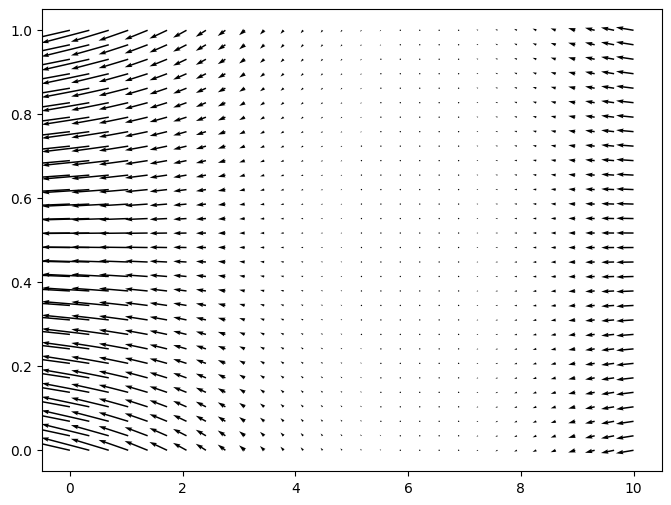

In [77]:
# Plot quiver 
euclidian_dist_test = euclidian_distance(x_test,y_test,xyk1,c)[0]
ux2 = tps_rbf(euclidian_dist_test) @ resultado2.x[:N+M]
uy2 = tps_rbf(euclidian_dist_test) @ resultado2.x[N+M:]

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.quiver(Xt, Yt, ux2.reshape(t,t).T, uy2.reshape(t,t).T)

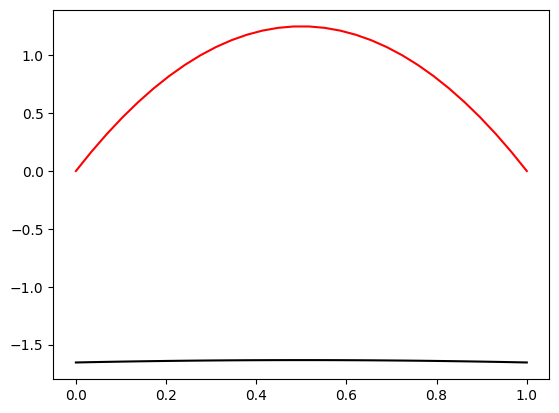

In [78]:
plt.plot(y_test,ux2.reshape(t,t).T[:,0],color = 'black')
#plt.plot(y_int, -5*Re/beta*(y_int**2 - Ly*y_int),color = 'red')
plt.plot(y_test, -5*(y_test**2 - Ly*y_test),color = 'red')

In [21]:
N = (px - 2)*(py - 2)
M_4x = px 
M_4y = py - 2
M = 2* M_4x + 2* M_4y

In [25]:
weights3 = np.random.rand(3*px*py,1).reshape(-1,1)

In [26]:
gxx_int = (tpsdxx(x_vector_int,euclidian_dist_int)) 
gyy_int =  (tpsdyy(y_vector_int,euclidian_dist_int)) 
gx_int = (tpsdx(x_vector_int,euclidian_dist_int)) 
gy_int = tpsdy(y_vector_int,euclidian_dist_int)
g_int = tps_rbf(euclidian_dist_int)
gx_b4 = tpsdx(np.ones_like(y_int)*Lx,euclidian_dist_border4 )
gy_b4 = tpsdy(y_int,euclidian_dist_border4)
gxx_b4 = tpsdxx(np.ones_like(y_int)*Lx,euclidian_dist_border4)
gyy_b4 = tpsdyy(y_int,euclidian_dist_border4)
gb2 = tps_rbf(euclidian_dist_border2)
gb3 = tps_rbf(euclidian_dist_border3)
gxx_b3 = tpsdxx(np.zeros_like(y_int),euclidian_dist_border3)
gyy_b3 = tpsdyy(y_int,euclidian_dist_border3)
gx_b3 = tpsdx(np.zeros_like(y_int),euclidian_dist_border3)
gy_b3 = tpsdy(y_int,euclidian_dist_border3)

gb1 = tps_rbf(euclidian_dist_border1)
gb4 = tps_rbf(euclidian_dist_border4)

gxx_b2 = tpsdxx(x,euclidian_dist_border2)
gxx_b1 = tpsdxx(x,euclidian_dist_border1)
gyy_b2 = tpsdyy(np.ones_like(x)*Ly,euclidian_dist_border2)
gyy_b1 = tpsdyy(np.zeros_like(x),euclidian_dist_border1)

gy_b2 = tpsdy(np.ones_like(x)*Ly,euclidian_dist_border2)
gy_b1 = tpsdy(np.zeros_like(x),euclidian_dist_border1)

In [30]:
phidphidx = g_int * gx_int
phidphidy = g_int * gy_int	

phidphidx_b3 = gb3*gx_b3
phidphidy_b3 = gb3*gy_b3
phidphidx_b4 = gb4*gx_b4
phidphidy_b4 = gb4*gy_b4

In [31]:

def NavierStokessUP(weights):
        
    wx = weights[:N+M].reshape(-1,1)
    wy = weights[N+M:2*(N+M)].reshape(-1,1)
    wp = weights[2*(N+M):3*(N+M)].reshape(-1,1)
    wxiwxj = wx*wx
    wyiwyj = wy*wy
    wxiwyj = wx*wy
    wyiwxj = wy*wx
    #weights = np.concatenate((wx,wxiwxj,wyiwxj,wy,wxiwyj,wyiwyj),axis = 0)
    
    
    F = np.zeros(((3*N+ 6*(M_4x) + 6*(M_4y)),))
    #Ecuaiones diferenciales en puntos internos
        #Ecuacion en x
    F[0:N] +=  ( -np.dot(gxx_int,wx) - np.dot(gyy_int,wx) + np.dot(gx_int,wp) + np.dot(phidphidx,wxiwxj) + np.dot(phidphidy,wyiwxj)).flatten()
        #   Ecuacione en y
    F[N:2*N] += (-np.dot(gxx_int,wy) - np.dot(gyy_int,wy) + np.dot(gy_int,wp) + np.dot(phidphidx,wxiwyj) + np.dot(phidphidy,wyiwyj)).flatten() 
        #Ecuacion de continuidad
    F[2*N:3*N] += (np.dot(gx_int,wx) + np.dot(gy_int,wy)).flatten()
    
    #Condiciones de frontera
    
        # Condiciones de ux
    F[3*N  : 3*N +  M_4x] = ( np.dot( gb2 , wx ) ).flatten()
    F[3*N + ( M_4x): 3*N + 2 * ( M_4x)] = (np.dot(gb1,wx)).flatten()
    F[3*N + 2 * ( M_4x ):3*N + 2 * ( M_4x ) + (M_4y)] = (np.dot(gb3,wx) - 1.0).flatten()
    
    
        #Condiciones de uy
    F[3*N + 2 * ( M_4x) + M_4y : 3*N + 3 * ( M_4x ) + M_4y] = (np.dot(gb2,wy)).flatten()
    F[3*N + 3 * ( M_4x ) + M_4y:3*N + 4 * ( M_4x ) + M_4y] = (np.dot(gb1,wy)).flatten()
    F[3*N + 4 * ( M_4x ) + M_4y:3*N + 4 * ( M_4x ) + 2 * (M_4y)] = (np.dot(gb3,wy)).flatten()
    
        #Condiciones de p
    F[3*N + 4 * ( M_4x ) + 2 * (M_4y):3*N + 4 * ( M_4x ) + 3 * (M_4y)] = (np.dot(gb3,wp)).flatten()
    #Ecuaciones diferenciales en las fronteras
        #Ecuaciones en frontera de salida
    F[ 3*N + 4 * ( M_4x ) + 3 * (M_4y) :  3*N + 4 * ( M_4x ) + 4 * (M_4y)] = (np.dot(gx_b4,wx) + np.dot(gy_b4,wy)).flatten()
    F[3*N + 4 * ( M_4x ) + 4 * (M_4y):3*N + 4 * ( M_4x ) + 5 * (M_4y)] = (np.dot(gx_b4,wy)).flatten()
    F[3*N + 4 * ( M_4x ) + 5 * (M_4y):3*N + 4 * ( M_4x ) + 6 * (M_4y)] = ( -np.dot(gxx_b4,wx) - np.dot(gyy_b4,wx) + np.dot(gx_b4,wp) + np.dot(phidphidx_b4,wxiwxj) + np.dot(phidphidy_b4,wyiwxj)).flatten()
        #Ecuacion en frontera superior
    F[3*N + 4 * ( M_4x ) + 6 * (M_4y):3*N + 5 * ( M_4x ) + 6 * (M_4y) ] = (-np.dot(gxx_b2,wx) - np.dot(gyy_b2,wx) + np.dot(gy_b2,wp)).flatten()
        #Ecuacion en frontera inferior
    F[3*N + 5 * ( M_4x ) + 6 * (M_4y):3*N + 6 * ( M_4x ) + 6 * (M_4y)] = (-np.dot(gxx_b1,wx) - np.dot(gyy_b1,wx) + np.dot(gy_b1,wp)).flatten()
    return F#,F.shape
    
    

In [32]:
NavierStokessUP(weights3).shape

(384,)

In [33]:

# Define el vector inicial
x0 = (weights3.reshape(-1) ) # tamaño_total = tamaño del vector weights
print( NavierStokessUP(weights3).shape[0] >= x0.shape[0])
# Llamas al solucionador
resultado3 = least_squares(NavierStokessUP, x0, method='trf', verbose = 2) 

True
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.2304e+19                                    5.16e+18    
       1              3         8.9334e+17      1.14e+19       2.79e+00       6.80e+17    
       2              5         9.8076e+16      7.95e+17       1.40e+00       5.95e+16    
       3              6         9.6642e+15      8.84e+16       2.79e+00       1.12e+16    
       4              8         7.9932e+14      8.86e+15       1.40e+00       2.01e+15    
       5             10         1.1466e+14      6.85e+14       6.98e-01       7.38e+14    
       6             11         2.2359e+13      9.23e+13       1.40e+00       1.86e+14    
       7             13         1.4864e+13      7.49e+12       6.98e-01       3.01e+14    
       8             15         3.4561e+12      1.14e+13       1.74e-01       5.92e+13    
       9             17         1.5885e+12      1.87e+12       8.72e-02       2.22e+1

KeyboardInterrupt: 